# Amr Shawki 100-1990
- a) Convert the given image from RGB to YCbCr colorspace. ✅
- b) Display the three components of the image in three separate images. ✅
- c) Apply a 4:2:2 subsampling to the YCbCr components above. ✅
- d) Display the images after subsampling. ✅
- e) What are the resolutions of each of the three components before and after subsampling? (Add your calculations and comments as a text in your google colab/jupyter notebook) ✅

In [47]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

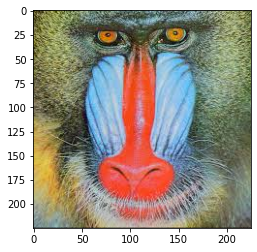

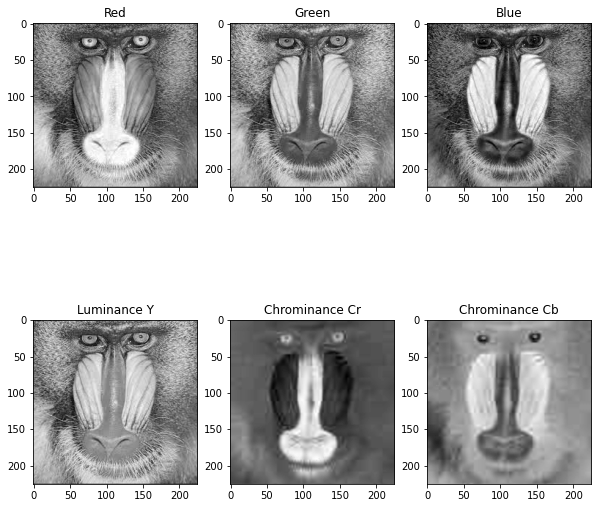

In [48]:
# Load image with imread() function
fn3= 'mandrill.jpg'
img1 = cv2.imread(fn3, cv2.IMREAD_COLOR)

# Convert RGB to BGR to be able to convert
img2=np.zeros(img1.shape,np.uint8)
img2[:,:,0]=img1[:,:,2]
img2[:,:,1]=img1[:,:,1]
img2[:,:,2]=img1[:,:,0]
plt.imshow(img2)

# Convert BGR to YCrCb color space
transcol=cv2.cvtColor(img1, cv2.COLOR_BGR2YCR_CB)

# Plot RGB image channels
plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
plt.imshow(img1[:,:,2],cmap="gray")
plt.title('Red')
plt.subplot(2,3,2)
plt.imshow(img1[:,:,1],cmap="gray")
plt.title('Green')
plt.subplot(2,3,3)
plt.imshow(img1[:,:,0],cmap="gray")
plt.title('Blue')

# Plot YCrCb image channels
plt.subplot(2,3,4)
plt.imshow(transcol[:,:,0],cmap="gray")
plt.title('Luminance Y')
plt.subplot(2,3,5)
plt.imshow(transcol[:,:,1],cmap="gray")
plt.title('Chrominance Cr')
plt.subplot(2,3,6)
plt.imshow(transcol[:,:,2],cmap="gray")
plt.title('Chrominance Cb')

plt.show()

<class 'numpy.uint8'>


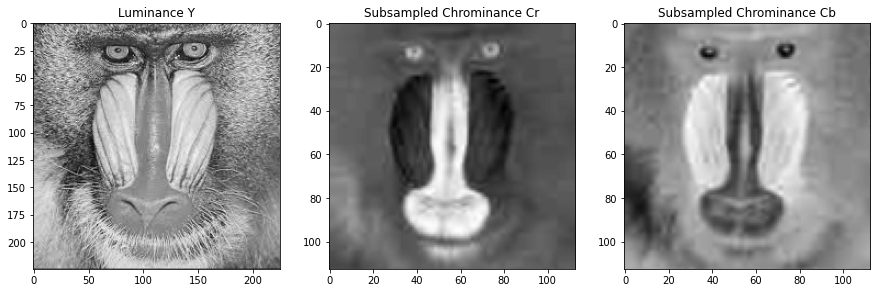

In [49]:
crf=cv2.boxFilter(transcol[:,:,1],ddepth=-1,ksize=(2,2))
cbf=cv2.boxFilter(transcol[:,:,2],ddepth=-1,ksize=(2,2))
print(type(crf[0,0]))
SSV=2
SSH=2
crsub=crf[::SSV,::SSH]
cbsub=cbf[::SSV,::SSH]

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(transcol[:,:,0],cmap="gray")
plt.title('Luminance Y')
plt.subplot(1,3,2)
plt.imshow(crsub,cmap="gray")
plt.title('Subsampled Chrominance Cr')
plt.subplot(1,3,3)
plt.imshow(cbsub,cmap="gray")
plt.title('Subsampled Chrominance Cb')

plt.show()

### The image resolution was halfed when we did the chroma sub-sampling for Cr and Cb layers but luma layer stayed the same



In [50]:
def cv_size(img):
    return tuple(img.shape[1::-1])

print('Luma before:', cv_size(transcol[:,:,0]))
print('Cr before:', cv_size(transcol[:,:,1]))
print('Cb before:', cv_size(transcol[:,:,0]), '\n')
print('Luma after:', cv_size(transcol[:,:,0]))
print('Cr after:', cv_size(crsub))
print('Cb after:', cv_size(cbsub))

Luma before: (225, 225)
Cr before: (225, 225)
Cb before: (225, 225) 

Luma after: (225, 225)
Cr after: (113, 113)
Cb after: (113, 113)
